# Assignment 3
## Part 1a - part 1: creating a synthetic data set

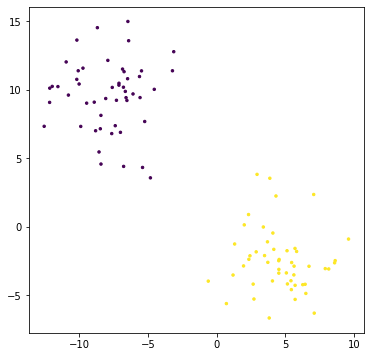

In [6]:
## Assignment 3
## Problem 1a - part 1: creating 50 pos. and 50 neg. 2d points

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

N = 100;
## Creates a data set of 100 points with 50 positive and 50 negative values
x, y = make_blobs(n_samples= N , n_features=2, centers=2, cluster_std=2.3, random_state=47)

## Splitting the data into 70% train and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1], c=y, s=6)
plt.show()

## This part is just adding the dummy variable to the beginning of each x element 
## and changing the values of y to -1 and 1 instead of 0 and 1
n = len(x_train)
x_train = np.c_[np.ones(n), x_train]
#print(x_train)

y_train[y_train == 0] = -1
#print(y_train)

n = len(x_test)
x_test = np.c_[np.ones(n), x_test]
#print(x_train)

y_test[y_test == 0] = -1
#print(y_train)

# Problem 1a - part 2
Defined some helper functions to be used in the batch perceptron algorithm

In [7]:
## I define some helper function to call when running through the perceptron algorithm. 
## Predicts the y value as +- 1 for a given x and weight
def y_prediction(x, w):
    return np.sign(x.dot(w))
    
## Sums the x and y that were added to the list of wrong predictions
def sum_Mk(M_k):
    dummy = 0
    for i in range(0,len(M_k),2):
        dummy = dummy + M_k[i][0]*M_k[i][1]
    
    return dummy

## This sum function is used for 1b when I want to get an average weight vector to plot as my decision boundry
## x represents 
def sum(x):
    total = 0
    for i in range(len(x)):
        total = total + x[i][0]
        
    return total
## RSS error
def error_rss(x, y, w):
    diff = y - y_prediction(x,w)
    return diff.T@diff
## Error function as defined in lecture slides
## Takes in a list of x and y values and the weight then iterates over each to get the total error
def error_func(M_k,w):
    error = 0
    for i in range(len(M_k)):
        x = M_k[i][0]
        y = M_k[i][1]
        error = error + w.T.dot(x*y)
        
    return error
    

In [8]:
## Problem 1a part 2
## Batch Perceptron Algorithm

def batch(x,y,w,batchSize,mu,train = True):
    ## initializing RSS, error
    k = 0
    RSS = []
    err = []
    ## iterates over a batchsize
    for k in range(batchSize):
        M_k = []
        j = 0
        ## Each iteration will predict a y value for a given x value
        for j in range(len(x)):
            y_pred = y_prediction(x[j], w)
            # checks if the prediction is right and if not it adds that x and y value to a list
            if y_pred != y[j]:
                M_k.append([x[j], y[j]])
        ## Once the list is made the RSS is calculated and error list
        RSS.append(error_rss(x,y,w))
        err.append(error_func(M_k,w))
        ## updates the weights for next batchsize
        w = w + mu*sum_Mk(M_k)
      
    
    return w, RSS, err


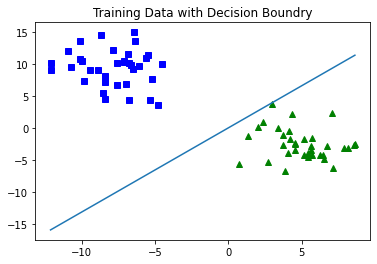

In [9]:
## Problem 1 part a2
## Plotting training data with predicted curve
w = np.array([0, 0, 0])
w_batch = batch(x_train,y_train,w, 100, 0.01, True)[0]

plt.plot(x_train[:, 1][y_train == 1], x_train[:, 2][y_train == 1], 'g^')
plt.plot(x_train[:, 1][y_train == -1], x_train[:, 2][y_train == -1], 'bs')

bp_xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
bp_yy = (w_batch[1]*bp_xx + w_batch[0])/(-1*w_batch[2])
plt.plot(bp_xx, bp_yy)
plt.title('Training Data with Decision Boundry')
plt.show()

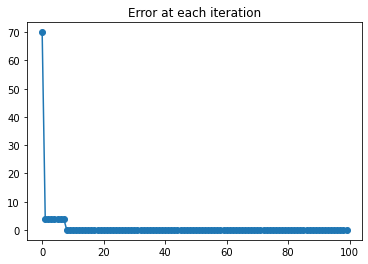

In [10]:
## Problem 1a part 2
## Showing error of the perceptron batch algo. RSS
w = np.array([0, 0, 0])
#w = batch(x_train,y_train,5)[0]
err_curve = batch(x_train,y_train, w, 100,0.01,True)[1]
#print(err_curve)
iterations = np.arange(len(err_curve))

plt.plot(iterations, err_curve,'-o')
plt.title('Error at each iteration')
plt.show()


# Problem 1c - part 3
Plotting the test value with the decision boundry calculated from the training set

Accuracy:  1.0


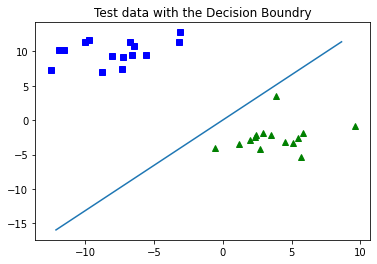

In [11]:
# Problem 1a - part 3
## Getting the accuracy of the weights compared to the test data
w = np.array([0, 0, 0])
w_batch = batch(x_train,y_train,w, 100, 0.01)[0]
y_pred = y_prediction(x_test,w_batch)
batch_acc = accuracy_score(y_test, y_pred)

print('Accuracy: ', batch_acc)
## Plotting the test set values
plt.plot(x_test[:, 1][y_test == 1], x_test[:, 2][y_test == 1], 'g^')
plt.plot(x_test[:, 1][y_test == -1], x_test[:, 2][y_test == -1], 'bs')

## Then plotting the predicted line on the same graph
plt.plot(bp_xx, bp_yy)
plt.title('Test data with the Decision Boundry')
plt.show()


# Problem 1a - part 4: Seq. Perceptron Algorithm

In [12]:
# Problem 1a - part 4
## Sequential Perceptron Algorithm using the help function defined above

def seq(x,y,epoch, mu):
    w = np.array([0, 0, 0])
    k = 0
    
    RSS = []
    
    for k in range(epoch):
        
        for j in range(len(x)):
            M_k = []
            y_pred = y_prediction(x[j], w)
    
            if y_pred != y[j]: 
                M_k.append([x[j], y[j]])
                w = w + mu*x[j]*y[j]
        
        RSS.append(error_rss(x,y,w))
             
               

    return w, RSS



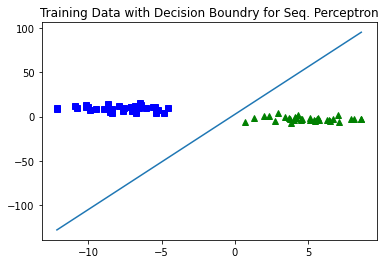

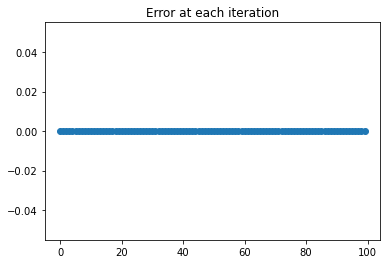

In [13]:
## Plotting training data and decision boundry
plt.plot(x_train[:, 1][y_train == 1], x_train[:, 2][y_train == 1], 'g^')
plt.plot(x_train[:, 1][y_train == -1], x_train[:, 2][y_train == -1], 'bs')

w_seq = seq(x_train,y_train,100, 0.01)[0]
sp_xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
sp_yy = (w_seq[1]*sp_xx + w_seq[0])/(-1*w_seq[2])
plt.plot(sp_xx, sp_yy)
plt.title('Training Data with Decision Boundry for Seq. Perceptron')
plt.show()

## Showing error of the perceptron batch algo. RSS
#w = batch(x_train,y_train,5)[0]
err_curve = seq(x_train,y_train,100,0.01)[1]
#print(err_curve)
iterations = np.arange(len(err_curve))

plt.plot(iterations, err_curve,'-o')
plt.title('Error at each iteration')
plt.show()

# Problem 1a - part 5: showing test data and decision boundry

Accuracy:  1.0


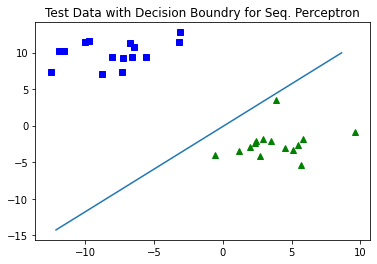

In [14]:
## Problem 1a - part 5

## Plotting training data with predicted curve
w_seq = seq(x_test,y_test,100, 0.01)[0]

y_pred = y_prediction(x_test,w_seq)
batch_acc = accuracy_score(y_test, y_pred)

print('Accuracy: ', batch_acc)

err = seq(x_test,y_test,100, 0.01)[1]
plt.plot(x_test[:, 1][y_test == 1], x_test[:, 2][y_test == 1], 'g^')
plt.plot(x_test[:, 1][y_test == -1], x_test[:, 2][y_test == -1], 'bs')

sp_xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
sp_yy = (w_seq[1]*sp_xx + w_seq[0])/(-1*w_seq[2])
plt.plot(sp_xx, sp_yy)
plt.title('Test Data with Decision Boundry for Seq. Perceptron')
plt.show()




# Problem 1a - part 6: Effect of different learning rates

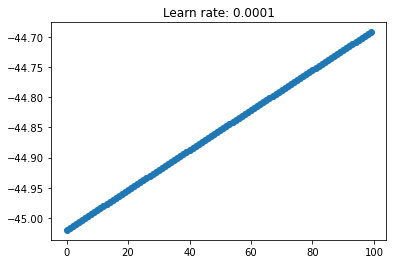

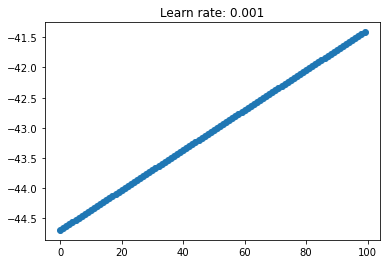

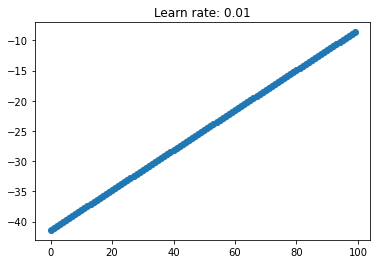

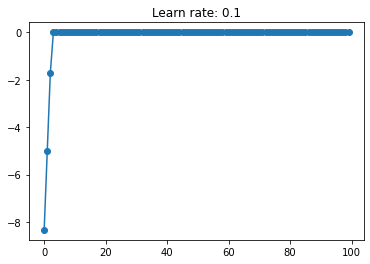

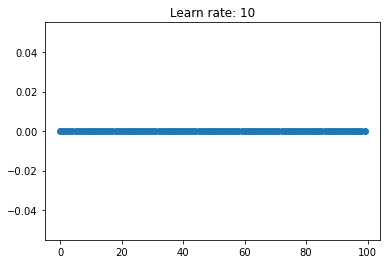

In [15]:
## Problem 1a - part 6
n = 100
w = np.array([np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100)])
## Finding error based on different learning rates
w,rss1, err_1 = batch(x_train,y_train,w, n, 0.0001, True)
w,rss2, err_2 = batch(x_train,y_train,w, n, 0.001, True)
w,rss3, err_3 = batch(x_train,y_train,w, n, 0.01, True)
w,rss4, err_4 = batch(x_train,y_train,w, n, 0.1, True)
w,rss5, err_5 = batch(x_train,y_train,w, n, 100, True)

## Creating the number of iterations based on size of the error
iteration_1 = np.arange(len(err_1))
iteration_2 = np.arange(len(err_2))
iteration_3 = np.arange(len(err_3))
iteration_4 = np.arange(len(err_4))
iteration_5 = np.arange(len(err_5))

## Plotting the error to show how it converges for certain learning rates
plt.plot(iteration_1, err_1,'-o')
plt.title('Learn rate: 0.0001')
plt.show()
plt.plot(iteration_2, err_2,'-o')
plt.title('Learn rate: 0.001')
plt.show()
plt.plot(iteration_3, err_3,'-o')
plt.title('Learn rate: 0.01')
plt.show()
plt.plot(iteration_4, err_4,'-o')
plt.title('Learn rate: 0.1')
plt.show()
plt.plot(iteration_5, err_5,'-o')
plt.title('Learn rate: 10')
plt.show()





In Part 6 when varying the learning rate it can be seen that the error when the learning rate is to small is linear and will take a long time to converge. While the learning rate around 0.01 converges at a reasonable pace and does not over shoot. Lastly, a learning rate to large gives a flat which I think shows that the algorithm jump straight to  an error of zero and with a more complex data set would not perform well. So for the choice of learning rate, around mu = 0.01 is a good choice. 

# Problem 1a - part 7: Using SkLearn Package

Classifier Weights:  [[ 1.          5.12197364 -1.75726974]]
Classifier Constant: [1.]


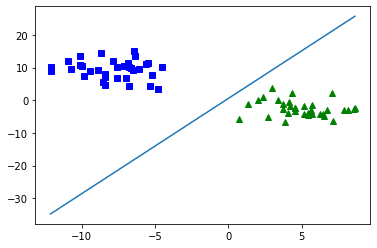

In [16]:
## Problem 1a - part 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.linear_model import Perceptron

clf = Perceptron()

clf.fit(x_train,y_train)

print("Classifier Weights: ", clf.coef_)
print("Classifier Constant:", clf.intercept_)

plt.plot(x_train[:, 1][y_train == 1], x_train[:, 2][y_train == 1], 'g^')
plt.plot(x_train[:, 1][y_train == -1], x_train[:, 2][y_train == -1], 'bs')

# Decision boundary 
xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
yy = (clf.coef_[0][1]*xx + clf.intercept_)/(-1*clf.coef_[0][2])
plt.plot(xx, yy)
plt.show()

As can be seen from the SkLearn package, the decision boundry created was a 100% accurate just like the batchperceptron boundry and sequential perceptron boundry. It should be noted that the SkLearn decision boundry created though is not the exact same as the decision boundry created in either of the other models. However all three decision boundry work on the data set.

# Problem 1b - part 1: Generating a nonlinear data set

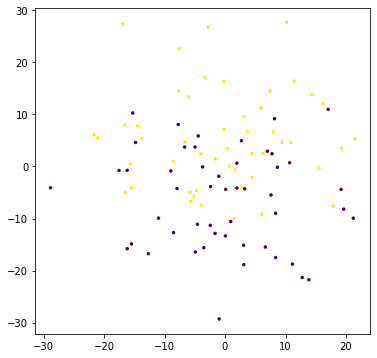

In [17]:
N = 100;

x, y = datasets.make_blobs(n_samples=N, centers=2, n_features=2, cluster_std=10, random_state=100)
#plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'g^')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
############################################################################
## This part is just adding the dummy variable to the beginning of each x element 
## and changing the values of y to -1 and 1 instead of 0 and 1
n = len(x_train)
x_train = np.c_[np.ones(n), x_train]
#print(x_train)

y_train[y_train == 0] = -1
#print(y_train)

n = len(x_test)
x_test = np.c_[np.ones(n), x_test]
#print(x_train)

y_test[y_test == 0] = -1
#print(y_train)

####################################################################3333
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1], c=y, s=6)
plt.show()


In [18]:
## Batch Perceptron Algorithm - for nonseperable data

def avg_batch(x,y,epochs, mu):
    w = np.array([0, 0, 0])
    k = 0
    c = 0
    weight_list = [(w,c)]
    for T in range(epochs-1):
         
        for i in range(len(x)):
            y_pred = y_prediction(x[i],w)
            
            if y_pred == y[i]:
                c += 1
            else:
                w = w + x[i]*y[i]
                c = 1
                k += 1  
                
        weight_list.append([w, c])
          
                
    return weight_list
    
    
def avg(x,y,list):
    prediction = []
    err = []
    for i in range(len(x)):
        y_hat = 0
        ## for a single x value it will calculate and sum the prediction from all the weights
        for j in range(len(list)):
            c = list[j][1]
            w = list[j][0]
            y_hat = y_hat + c*x[i].dot(w)
        ## that prediction is then stored in the prediction array 
        prediction.append(y_hat)
        pred = np.sign(np.array(prediction))
        err.append(error_rss(x,y,w))
    ## returns the prediction for each x value given  
    return pred, err

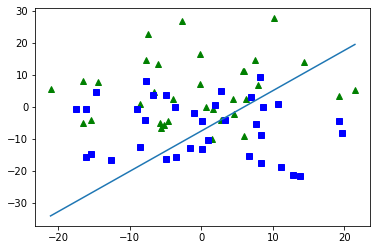

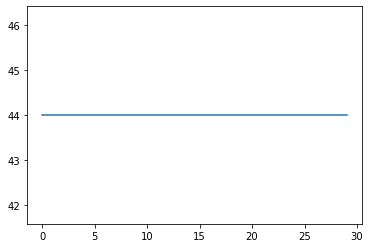

In [19]:
## Assignment 3b part 2
## Gets the list of weights and amount of success that weight had
list = avg_batch(x_train, y_train, 100, 0.01)
## Takes an average of the weights
avg_w = 1/len(list)*sum(list[:])
## Average the prediction based on the set of weights found in average pereptron model
pred, err = avg(x_test,y_test, list)

## Plotting training data and decision boundry
plt.plot(x_train[:, 1][y_train == 1], x_train[:, 2][y_train == 1], 'g^')
plt.plot(x_train[:, 1][y_train == -1], x_train[:, 2][y_train == -1], 'bs')

ap_xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
ap_yy = (avg_w[1]*sp_xx + avg_w[0])/(-1*avg_w[2])
plt.plot(ap_xx, ap_yy)
plt.show()

## Plotting error 
iterations = np.arange(len(err))
plt.plot(iterations, err)
plt.show()